In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits, load_wine, load_diabetes, make_blobs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree

from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz


from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# 1. Naive Bayes

- 조건부 확률
- 선형 모델과 유사(Logistic Regression, LinearSVC, ...)
- 훈련 속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
- 종류
    + GaussianNB : 연속적인 데이터
    + BernoulliNB : 이산 데이터
    + MultinomialNB : 이산 데이터
- 파라미터
    + alpha

## (1) GaussianNB

In [16]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=.2)

In [17]:
model = GaussianNB().fit(X_train, y_train)

In [18]:
preds = model.predict(X_test)

In [19]:
print("정확도 : ", accuracy_score(y_test, preds))

정확도 :  0.9333333333333333


In [20]:
confusion_matrix(y_test, preds)

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  7]], dtype=int64)

## (2) MultinomialNB, BernoulliNB

+ 영화 리뷰를 이용한 평가예측(부정/긍정)

In [21]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [22]:
##### type 특성을 숫자로 매핑
df['label'] = df['type'].map({'positive':1, 'negative':0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [23]:
df_X = df['movie_review']
df_y = df['label']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # term-document matrix 만들기

X_traincv = cv.fit_transform(df_X)
X_traincv

encoded_input = X_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [25]:
##### 단어 사전
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [28]:
cv.inverse_transform([encoded_input[0]]) # 숫자를 이름으로 다시변환

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [29]:
model = MultinomialNB().fit(X_traincv, df_y)

In [30]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

In [31]:
test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({'positive':1, 'negative':0})

test_X = test_df['movie_review']
test_y = test_df['label']

In [32]:
X_testcv = cv.transform(test_X)
X_testcv

preds = model.predict(X_testcv)

In [35]:
accuracy_score(test_y, preds)

1.0

In [37]:
##### BernouillNB

model2 = BernoulliNB().fit(X_traincv, df_y)

test_df = pd.DataFrame(test_feedback_list)
test_df['label'] = test_df['type'].map({'positive':1, 'negative':0})

test_X = test_df['movie_review']
test_y = test_df['label']

X_testcv = cv.transform(test_X)
X_testcv

preds = model2.predict(X_testcv)
accuracy_score(test_y, preds)

1.0

- 스팸 메일 분류

In [2]:
email_list = [ 
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

In [5]:
df = pd.DataFrame(email_list)

df['label'] = df['spam'].map({True:1, False:0})

df_X = df['email title']
df_y = df['label']

cv = CountVectorizer()

X_traincv = cv.fit_transform(df_X)

In [8]:
##### multinomialNB

model1 = MultinomialNB().fit(X_traincv, df_y)

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1, False:0})

test_X = test_df['email title']
test_y = test_df['label']

X_testcv = cv.transform(test_X)
preds= model1.predict(X_testcv)

accuracy_score(test_y, preds)

0.8333333333333334

In [10]:
##### BernoulliNB

model2 = BernoulliNB().fit(X_traincv, df_y)

test_df = pd.DataFrame(test_email_list)
test_df['label'] = test_df['spam'].map({True:1, False:0})

test_X = test_df['email title']
test_y = test_df['label']

X_testcv = cv.transform(test_X)
preds= model2.predict(X_testcv)

accuracy_score(test_y, preds)

0.8333333333333334

# 2. K-Means

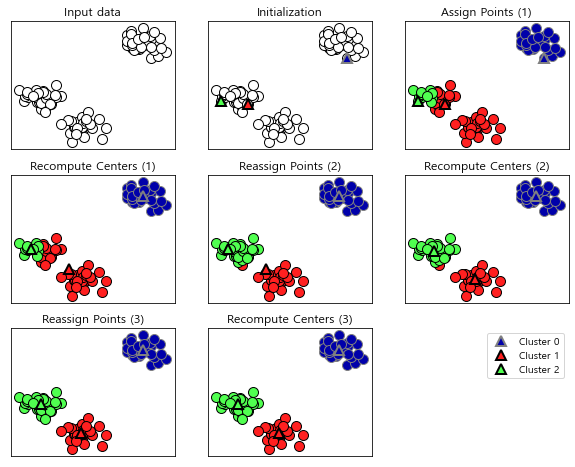

In [12]:
mglearn.plots.plot_kmeans_algorithm()

## 1) make_blobs 샘플

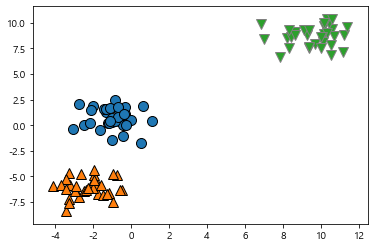

In [38]:
X, y = make_blobs()

mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [39]:
model = KMeans(n_clusters=5).fit(X)

In [40]:
model.labels_

array([1, 1, 3, 3, 0, 4, 0, 4, 2, 2, 3, 3, 3, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       3, 1, 2, 0, 2, 0, 0, 2, 0, 1, 4, 1, 0, 4, 3, 4, 2, 2, 2, 2, 1, 0,
       1, 0, 2, 3, 1, 2, 2, 2, 4, 2, 3, 4, 0, 2, 2, 2, 0, 0, 1, 1, 2, 4,
       1, 3, 4, 0, 4, 2, 3, 0, 4, 0, 4, 0, 4, 1, 0, 2, 4, 0, 0, 4, 4, 2,
       4, 1, 3, 3, 2, 1, 2, 2, 2, 0, 2, 2])

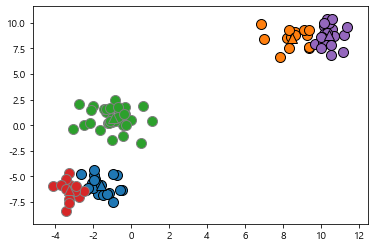

In [41]:
mglearn.discrete_scatter(X[:,0], X[:,1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                        [0, 1, 2, 3, 4], markers="^")

## 2) make_moons 샘플

In [42]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

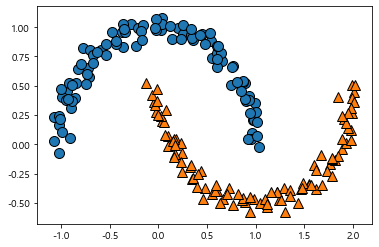

In [43]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [44]:
model = KMeans(n_clusters=2).fit(X)

In [45]:
model.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0])

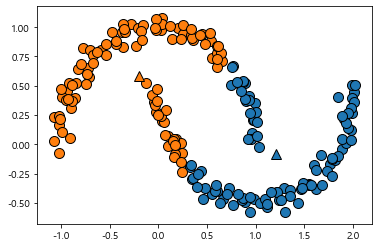

In [47]:
mglearn.discrete_scatter(X[:,0], X[:,1], model.labels_, markers="o")
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                        [0, 1], markers="^")

In [48]:
preds = model.predict(X)
accuracy_score(y,preds)

0.245

## 3) iris 샘플

In [62]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

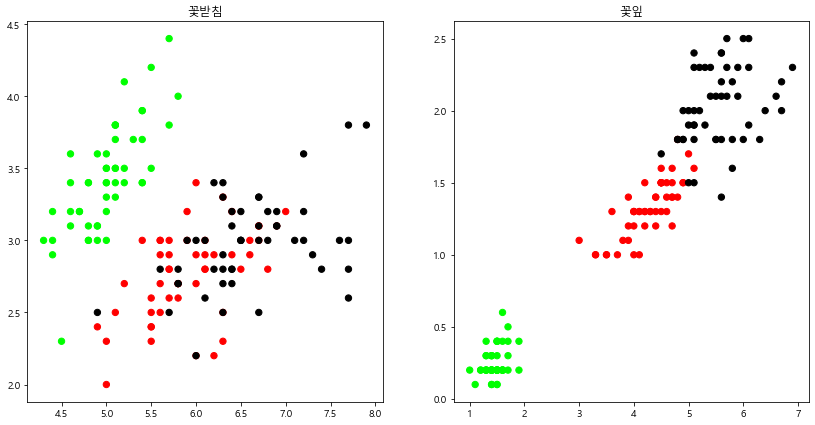

In [63]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽃잎")

In [64]:
model = KMeans(n_clusters=3).fit(X)

In [65]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '예측값')

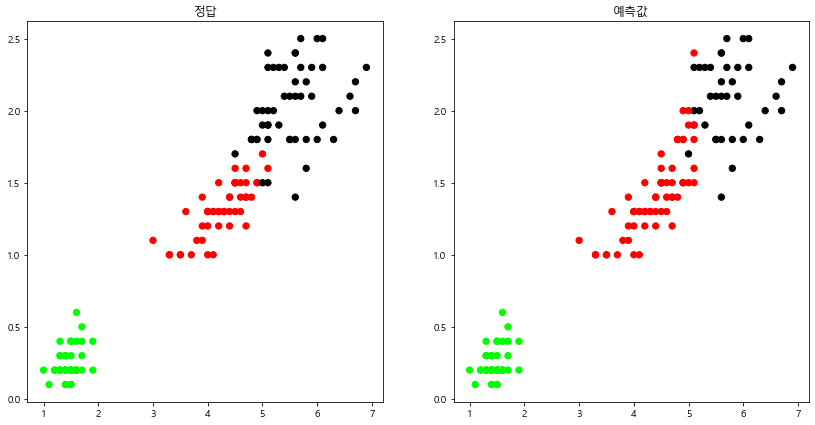

In [66]:
plt.figure(figsize=(14,7))
colormap = np.array(["lime","red","black"])

plt.subplot(1,2,1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title('예측값')

In [67]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [68]:
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

## 4) 사람의 키와 몸무게를 활용

In [69]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


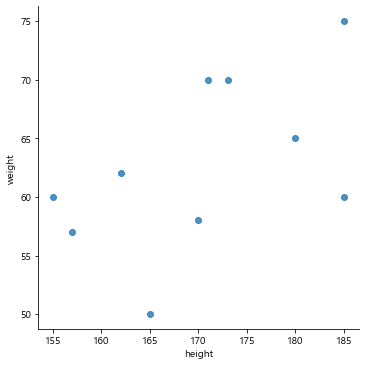

In [70]:
sns.lmplot("height","weight",data=df,fit_reg=False)

In [71]:
model = KMeans(n_clusters=3).fit(df.values)

In [72]:
df['label'] = model.labels_
df

,height,weight,label
0,185,60,2
1,180,65,2
2,185,75,2
3,165,50,1
4,170,58,1
5,155,60,1
6,157,57,1
7,162,62,1
8,173,70,0
9,171,70,0


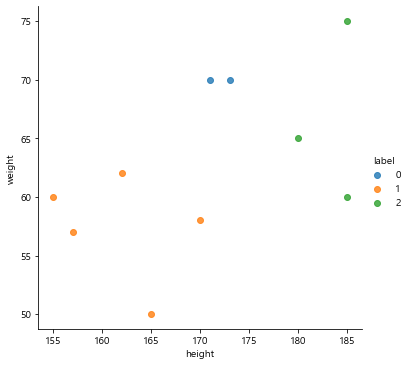

In [73]:
sns.lmplot('height','weight',data=df,fit_reg=False,hue='label')

---
# 3. 인공신경망(Artificial Neural Network)

In [74]:
import os
os.environ['PATH'] += os.pathsep + "C:/Program Files/Graphviz/bin"

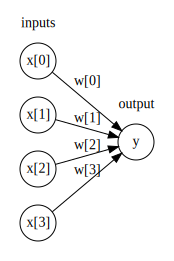

In [75]:
mglearn.plots.plot_logistic_regression_graph()

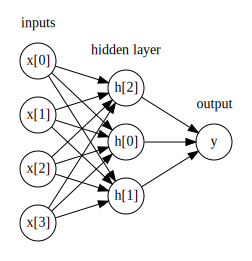

In [76]:
mglearn.plots.plot_single_hidden_layer_graph()

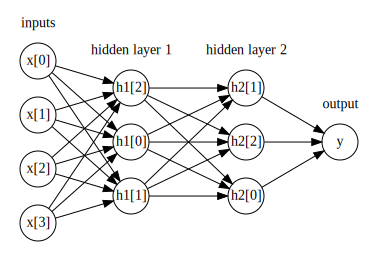

In [77]:
mglearn.plots.plot_two_hidden_layer_graph()

## (1) 퍼셉트론
   
      + 다수의 신호를 입력받아 하나의 신호로 출력

### 1) AND gate

In [78]:
def AND(x1, x2):
    w1, w2 = 0.5, 0.5
    b = 0.7
    
    tmp = w1*x1 + w2*x2
    
    if tmp <= b:
        return 0
    else: 
        return 1

In [81]:
inputs = [(0,0), (1,0), (0,1), (1,1)]

for x1, x2 in inputs:
    y = AND(x1, x2)
    print(" {}, {} -> {}".format(x1, x2, y))

 0, 0 -> 0
 1, 0 -> 0
 0, 1 -> 0
 1, 1 -> 1


### 2) OR gate

In [80]:
def OR(x1, x2):
    w1, w2 = 0.5, 0.5
    b = 0.2
    
    tmp = w1*x1 + w2*x2
    
    if tmp <= b:
        return 0
    else: 
        return 1

In [82]:
inputs = [(0,0), (1,0), (0,1), (1,1)]

for x1, x2 in inputs:
    y = OR(x1, x2)
    print(" {} , {} -> {}".format(x1, x2, y))

 0 , 0 -> 0
 1 , 0 -> 1
 0 , 1 -> 1
 1 , 1 -> 1


### 3) XOR gate

In [83]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [84]:
inputs = [(0,0), (1,0), (0,1), (1,1)]

for x1, x2 in inputs:
    y = NAND(x1, x2)
    print(" {} , {} -> {}".format(x1, x2, y))

 0 , 0 -> 1
 1 , 0 -> 1
 0 , 1 -> 1
 1 , 1 -> 0


In [85]:
def XOR(x1, x2):
    
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

In [86]:
inputs = [(0,0), (1,0), (0,1), (1,1)]

for x1, x2 in inputs:
    y = XOR(x1, x2)
    print(" {} , {} -> {}".format(x1, x2, y))

 0 , 0 -> 0
 1 , 0 -> 1
 0 , 1 -> 1
 1 , 1 -> 0


## (2) 인공신경망을 구현하는 방법

- sklearn : Perceptron(), MLPClassifier()
- ML, DL 프레임워크 : Tensorflow, Pytorch, Keras, Theeano, ...

### 1) Perceptron

In [87]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [89]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [90]:
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [91]:
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))

0.8


### 2) MLPClassifier

In [92]:
model2 = MLPClassifier(max_iter=1000, hidden_layer_sizes=(500, 500, 500, 500, 500, 500))
model2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 500, 500, 500, 500, 500), max_iter=1000)

In [93]:
preds = model2.predict(X_test)
print(accuracy_score(y_test, preds))

0.9555555555555556


# 4. Kaggle Challenge

- 타이타닉 샘플을 이용한 분류 알고리즘 성능 비교
- 캐글 제출용
- https://www.kaggle.com/c/titanic/

## (1) Prepare the Data

In [94]:
train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

In [95]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## (2) Exploratory Data Analysis

In [97]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [98]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar",stacked=True,figsize=(10,5))

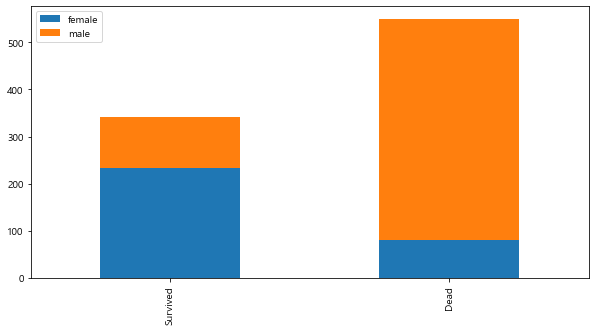

In [99]:
bar_chart("Sex")

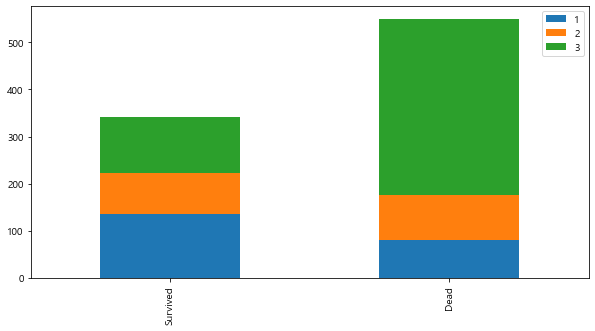

In [100]:
bar_chart("Pclass")

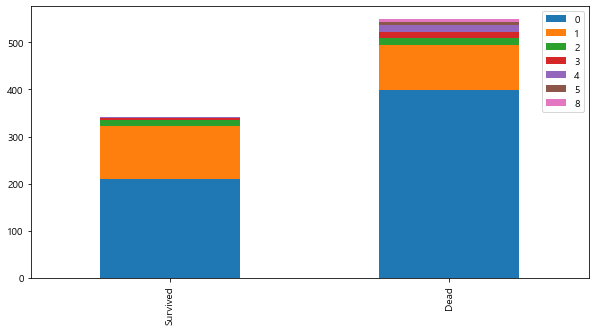

In [101]:
bar_chart("SibSp")

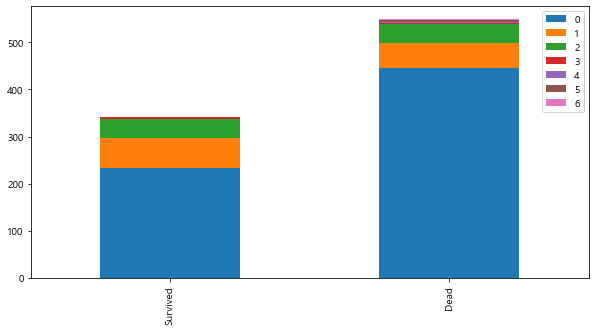

In [102]:
bar_chart("Parch")

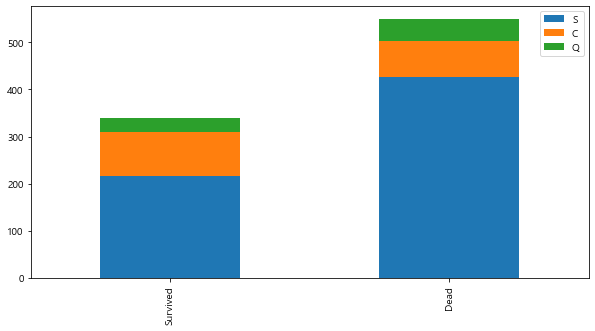

In [103]:
bar_chart("Embarked")

## (3) Feature Engineering

### 1) Name에서 호칭 추출(Mr, Mrs, Miss)

In [104]:
train_test_data = [train,test]

In [105]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-za-z]+)\.")

In [107]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Capt          1
Countess      1
Mme           1
Don           1
Ms            1
Sir           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [108]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Mlle":3, "Major":3,
                 "Capt":3, "Mme":3, "Lady":3, "Countess":3, "Don":3, "Jonkheer":3, "Sir":3, "Ms":3,
                "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [110]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [111]:
##### Name 특성 삭제

train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [112]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### 2) Age의 Binning

In [113]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [115]:
##### 결측치 처리
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [116]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [117]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


In [118]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


### 3) Embarked의 결측치 처리와 인코딩

In [119]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [120]:
train['Embarked'].fillna("S", inplace=True)

In [121]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({"S":0, "C":1, "Q":2})

In [122]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


### 4) Fare의 결측치와 Binning

In [124]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [125]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 100, "Fare"] = 3

In [126]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


In [127]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,female,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,male,4.0,0,0,240276,0.0,NaN,2,0
3,895,3,male,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,female,1.0,1,1,3101298,0.0,NaN,0,2


### 5) Cabin 처리

In [128]:
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
C30            1
C111           1
E46            1
C91            1
D10 D12        1
Name: Cabin, Length: 147, dtype: int64

In [129]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [130]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


In [131]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [132]:
train['Cabin'].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [133]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 6) 성별 인코딩

In [134]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

### 7) 동승자 컬럼 합치기

In [137]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

### 8) 필요없는 컬럼 삭제

In [138]:
feature_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)

In [140]:
train = train.drop(["PassengerId"], axis=1)

In [141]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [143]:
print(X.shape, y.shape)

(891, 8) (891,)


## (4) Modeling

In [145]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [147]:
##### KNN

knnclf = KNeighborsClassifier(n_neighbors=26)
scores = cross_val_score(knnclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.82222222 0.82022472 0.83146067 0.82022472 0.83146067 0.82022472
 0.82022472 0.79775281 0.83146067 0.82022472]


82.15

In [148]:
##### Decision Tree

dtclf = DecisionTreeClassifier()
scores = cross_val_score(dtclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.78888889 0.88764045 0.76404494 0.78651685 0.86516854 0.78651685
 0.79775281 0.79775281 0.74157303 0.80898876]


80.25

In [149]:
##### RandomForest

rfclf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rfclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.8        0.84269663 0.7752809  0.80898876 0.86516854 0.82022472
 0.82022472 0.80898876 0.7752809  0.83146067]


81.48

In [150]:
##### NaiveBayes

mlpclf = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200, 200))
scores = cross_val_score(mlpclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.75555556 0.83146067 0.82022472 0.7752809  0.73033708 0.79775281
 0.83146067 0.80898876 0.83146067 0.83146067]


80.14

In [151]:
##### SVM

svmclf = SVC()
scores = cross_val_score(svmclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

## (5) Testing

In [152]:
test.head()
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [153]:
model = SVC()
model.fit(X,y)

SVC()

In [155]:
test_data = test.drop("PassengerId", axis=1).copy()

In [156]:
test_data.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [157]:
preds = model.predict(test_data)

In [158]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":preds})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [159]:
submission.to_csv('data/titanic/submission.csv',index=False)